# HW 5 Работа с графом. Работа с NetworkX

## Получение датасета 

In [123]:
import numpy as np   # Библиотека для матриц, векторов и линала
import pandas as pd  # Библиотека для табличек
import time          # Библиотека для времени

import warnings
warnings.filterwarnings("ignore")


Набор данных представляет собой основные маршруты авиаперелетов в США за 2008-го год. В качестве модели распространения инфекции предлагается использовать SI (susceptible-infected) модель, в которой каждый аэропорт имеет два возможных состояния - “здоровый” или “зараженный”. Здоровый аэропорт может заразиться с некоторой вероятностью p (infection probability), если к нему прилетает самолет из зараженного города. Инфекция начинает распространение из некоторого стартового аэропорта и заканчивает распространение, когда все перелеты из датасета завершены.

In [58]:
# загружаем датасет рейсов 

df = pd.read_csv('2008.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [59]:
df.shape

(7009728, 29)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [62]:
# Выбиираем и оставляе данные только за один месяц (1-й месяц - Январь)
df1 = df[df.Month == 1]
df1.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [63]:
df1.shape

(605765, 29)

In [64]:
df1.loc[1]

Year                   2008
Month                     1
DayofMonth                3
DayOfWeek                 4
DepTime                 754
CRSDepTime              735
ArrTime                1002
CRSArrTime             1000
UniqueCarrier            WN
FlightNum              3231
TailNum              N772SW
ActualElapsedTime       128
CRSElapsedTime          145
AirTime                 113
ArrDelay                  2
DepDelay                 19
Origin                  IAD
Dest                    TPA
Distance                810
TaxiIn                    5
TaxiOut                  10
Cancelled                 0
CancellationCode        NaN
Diverted                  0
CarrierDelay            NaN
WeatherDelay            NaN
NASDelay                NaN
SecurityDelay           NaN
LateAircraftDelay       NaN
Name: 1, dtype: object

In [117]:
# Сохраняем данные
pd.to_pickle(df1, "data_jan.pkl")

In [124]:
df1 = pd.read_pickle("data_jan.pkl")
df1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605760,2008,1,15,2,837.0,843,955.0,1005,DL,1054,...,9.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
605761,2008,1,15,2,2017.0,2020,2142.0,2149,DL,1055,...,6.0,26.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
605762,2008,1,15,2,1531.0,1533,1708.0,1715,DL,1056,...,5.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
605763,2008,1,15,2,1431.0,1435,1546.0,1600,DL,1057,...,9.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


### Предобработка

Нас интересую следующие колонки:

```
Year
Month
DayofMonth
CRSDepTime - время отправки
CRSArrTime - время прибытия
Origin - код аэропотра отправки
Dest - код аэропорта прибытия
```

In [125]:
from datetime import datetime
from datetime import timedelta

# Функция, которая конвертирует 'HHHH' строку в формат 'HH:MM'
def to_time(int_var):
    # Если время больше 24:00 то 23:53
    if int_var >= 2400:
        int_var = 2359
    str_var = str(int_var).rjust(4, '0')
    return str_var[:2] + ':' + str_var[2:]

# Фукнция, которая дату и время конвертирует в datatime 
def to_datetime(year, month, day, time):

    h, m = time.split(sep=':')
    result = datetime(year, month, day, int(h), int(m))
    return result

In [126]:
# создаем колонки со временем отправки и прибытия
df1['dep_time'] = df1['CRSDepTime'].apply(to_time)
df1['arr_time'] = df1['CRSArrTime'].apply(to_time)


# создаем колонку со временем отправки
list = []
for index, cols in df1[['Year','Month','DayofMonth','dep_time']].iterrows(): 
    list.append(to_datetime(cols[0], cols[1], cols[2], cols[3]))
    if index % 100000 == 0:
        print(index)
df1['departure'] = pd.Series(list)  
    
# создаем колонку со временем прибытия
list = []
for index, cols in df1[['Year','Month','DayofMonth','arr_time']].iterrows(): 
    list.append(to_datetime(cols[0], cols[1], cols[2], cols[3]))
    if index % 100000 == 0:
        print(index)
df1['arrival'] = pd.Series(list)   


# Делаем датасет, только с четырьмя колонками 
# (время отправки, код аэропорта отправки, время прибытия, код аэропорта прибытия)
df = df1[['departure', 'Origin', 'arrival', 'Dest']]

# Если время прибытия больше, чем время отправки - то это ночные рейсы (добавляем 24 часа)
df.loc[df['departure'] > df['arrival'], 'arrival'] += timedelta(hours=24)

# Сортируем по времени отправки
df.sort_values('departure', inplace=True)

# Переиндексируем
df = df.reset_index(drop=True)
    
    

0
100000
200000
300000
400000
500000
600000
0
100000
200000
300000
400000
500000
600000


In [127]:
df.head()

,departure,Origin,arrival,Dest
0,2008-01-01 00:10:00,LAX,2008-01-01 07:37:00,DTW
1,2008-01-01 00:15:00,SMF,2008-01-01 08:23:00,JFK
2,2008-01-01 00:25:00,SMF,2008-01-01 05:35:00,DFW
3,2008-01-01 00:25:00,PHX,2008-01-01 07:09:00,JFK
4,2008-01-01 00:30:00,ONT,2008-01-01 08:31:00,JFK


In [128]:
# Сохраняем датафрейм с перелетами самолетов
pd.to_pickle(df, "data.pkl")

In [129]:
df = pd.read_pickle("data.pkl")
df

,departure,Origin,arrival,Dest
0,2008-01-01 00:10:00,LAX,2008-01-01 07:37:00,DTW
1,2008-01-01 00:15:00,SMF,2008-01-01 08:23:00,JFK
2,2008-01-01 00:25:00,SMF,2008-01-01 05:35:00,DFW
3,2008-01-01 00:25:00,PHX,2008-01-01 07:09:00,JFK
4,2008-01-01 00:30:00,ONT,2008-01-01 08:31:00,JFK
...,...,...,...,...
605760,2008-01-31 23:59:00,SLC,2008-02-01 06:16:00,JFK
605761,2008-01-31 23:59:00,PHX,2008-02-01 05:29:00,ATL
605762,2008-01-31 23:59:00,LAS,2008-02-01 02:51:00,SEA
605763,2008-01-31 23:59:00,LAS,2008-02-01 07:53:00,EWR


### 1. Симуляция

Функция для симуляции одного прохода по всему датасету и распространения инфекции. 

In [130]:
# На вход передается стартовый аэропорт, p - вероятнось зарожения
def simulation(airport, p, debug=False):
    # Список инфицированных аэропортов
    infected = [airport]
    # Словарь: инфицированные аэропорты и время инфицированния 
    # Сразу в словарь добавляем стартовый аэропорт
    results = {airport: to_datetime(2008, 1, 1, '00:00')}

    for row in df.itertuples():
        chance = np.random.uniform()

        # Проверяем, если самолет вылетел из инфицированного аэропорта и летит в еще не инфицированный
        if (row.Origin in infected) and (row.Dest not in infected):
            # Опасность представляет, только самолет, который вылетает уже после времени заражения аэропорт - иначе пропускаем 
            if results[row.Origin] > row.departure:
                continue
            # И проверям шанс заразить аэропорт  
            if chance <= p:    
                if debug:
                    print('Аэропорт инфицирован!', row)
                infected.append(row.Dest)
                results[row.Dest] = row.arrival
    return results

В качестве стартовой ноды/аэропорта для симуляций можно использовать Allentown (код ABE)

In [131]:
# N - всего аэропортов
N = len(df['Origin'].unique())
p = 0.01
# Аэропорт Allentown (код ABE)
airport = 'ABE'
print('Стартовый аэропорт:', airport)
np.random.seed(7)
res = do_simulation(airport, p, False)
print(f'Заражено за месяц: {len(res)}/{N} аэропортов')

Стартовый аэропорт: ABE
Заражено за месяц: 237/286 аэропортов


### 2. Скорость распространения заражения

Как инфекционность (вероятность заражения) болезни влияет на скорость распространения

Рассмотрим, насколько заразной должна быть болезнь, чтобы заразить все аэропорты в сети. Для каждой из вероятностей p=[0.01, 0.05, 0.1, 0.5, 1.] прогоним по 10 симуляций распространения, каждый раз сохраняя результаты

In [134]:
from tqdm import tqdm

np.random.seed(42)

# Список вероятностей
probs = [0.01, 0.05, 0.1, 0.5, 1]

# Кол-во симуляций распространения
n_sim = 10

# Аэропорт Allentown (код ABE)
airport = 'ABE'
print('Стартовый аэропорт:', airport)

results_df = pd.DataFrame(columns=['p', 'sim_id', 'airport', 'infected'])

for p in probs:
    print('Симуляция для p =', p)
    for i in tqdm(range(n_sim)):
        # запуск симуляции
        sim_res = pd.DataFrame.from_dict(do_simulation(airport, p), orient='index').reset_index()
        sim_res.columns = ['airport', 'infected']
        sim_res['p'] = p
        sim_res['sim_id'] = i
        results_df = pd.concat([results_df, sim_res]) 


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Стартовый аэропорт: ABE
Симуляция для p = 0.01


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Симуляция для p = 0.05


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Симуляция для p = 0.1


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Симуляция для p = 0.5


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

Симуляция для p = 1


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:15<00:00,  7.55s/it]


In [136]:
pd.to_pickle(results_df, "data_results.pkl")

In [137]:
results_df = pd.read_pickle("data_results.pkl")
results_df

,p,sim_id,airport,infected
0,0.01,0,ABE,2008-01-01 00:00:00
1,0.01,0,CLE,2008-01-08 07:59:00
2,0.01,0,RIC,2008-01-09 16:35:00
3,0.01,0,MCO,2008-01-09 18:15:00
4,0.01,0,LGA,2008-01-10 10:05:00
...,...,...,...,...
282,1.00,9,FLO,2008-01-02 14:05:00
283,1.00,9,ADK,2008-01-03 16:20:00
284,1.00,9,CDC,2008-01-07 14:37:00
285,1.00,9,PLN,2008-01-07 23:45:00


Для каждых 12 часов симуляции посчитаем, какой средний процент аэропортов от общего их числа, был заражен к этому моменту времени. 

In [149]:
# Временные границы датасета
min_time = df['departure'].min()
max_time = df['arrival'].max()
print(f'С {min_time} по {max_time}')

# Словарь результатов
tsim_res = dict()

# Для каждых 12 часов считаем средний процент зараженных аэропортов
dt = timedelta(hours=12)

# Считаем показатели заражения для времени в пределах границы датасета (прибавляем каждый раз по 12 часов)
tp = min_time
while tp < max_time:
    infected_pct = results_df[results_df.infected <= tp].groupby(['p', 'sim_id']).size()/N
    infected_pct = infected_pct.reset_index().groupby('p')[0].mean()
    tsim_res[tp] = infected_pct
    tp += dt
    
tsim_res    

С 2008-01-01 00:10:00 по 2008-02-01 22:36:00


{Timestamp('2008-01-01 00:10:00'): p
 0.01    0.003497
 0.05    0.003497
 0.10    0.003497
 0.50    0.003497
 1.00    0.003497
 Name: 0, dtype: float64,
 Timestamp('2008-01-01 12:10:00'): p
 0.01    0.003497
 0.05    0.004895
 0.10    0.010490
 0.50    0.148951
 1.00    0.454545
 Name: 0, dtype: float64,
 Timestamp('2008-01-02 00:10:00'): p
 0.01    0.006993
 0.05    0.060140
 0.10    0.331119
 0.50    0.792308
 1.00    0.951049
 Name: 0, dtype: float64,
 Timestamp('2008-01-02 12:10:00'): p
 0.01    0.015385
 0.05    0.106993
 0.10    0.455594
 0.50    0.885664
 1.00    0.975524
 Name: 0, dtype: float64,
 Timestamp('2008-01-03 00:10:00'): p
 0.01    0.040210
 0.05    0.298252
 0.10    0.686014
 0.50    0.956294
 1.00    0.989510
 Name: 0, dtype: float64,
 Timestamp('2008-01-03 12:10:00'): p
 0.01    0.053846
 0.05    0.352448
 0.10    0.726224
 0.50    0.964336
 1.00    0.989510
 Name: 0, dtype: float64,
 Timestamp('2008-01-04 00:10:00'): p
 0.01    0.096503
 0.05    0.475874
 0.10    

График числа зараженных городов в зависимости от времени для каждой из вероятностей

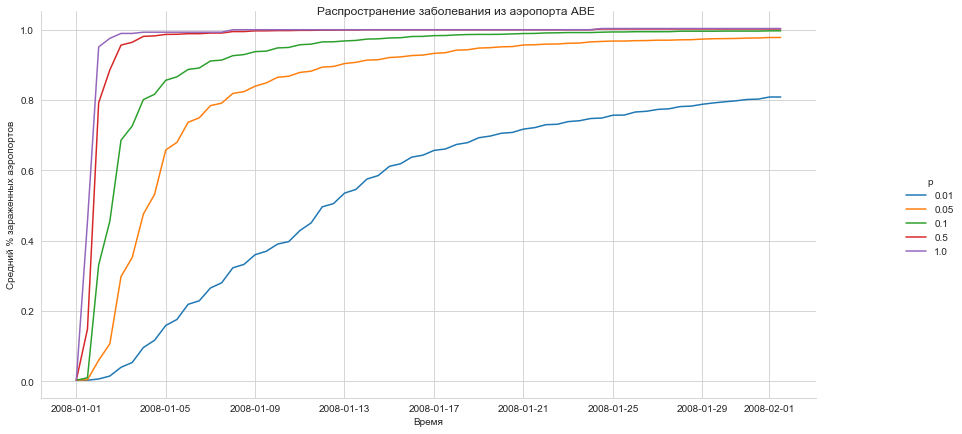

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем датафрейм для отображения
data_viz = pd.DataFrame.from_dict(tsim_res, orient='index')
data_viz = data_viz.reset_index().melt(id_vars='index', var_name='p')
data_viz['p'] = data_viz.p.astype('category')

# Отображаем
sns.set_style('whitegrid')
lp = sns.relplot(data=data_viz, kind='line', x='index', y='value', hue='p')
lp.fig.set_figwidth(14)
lp.fig.set_figheight(6)
lp.fig.suptitle(f'Распространение заболевания из аэропорта {airport}')
lp.ax.set_xlabel('Время')
lp.ax.set_ylabel('Средний % зараженных аэропортов')
plt.show()

### 3. Работа с NetworkX

Строим ненаправленный граф всех аэропортов, используя относительное число перелетов между соседними аэропортами в качестве веса ребра. 

Например, если из аэропорта А в аэропорт Б суммарно есть 5 рейсов, из Б в А 10 рейсов, а всего в сети 150 перелетов, то вес ребра между А и Б должен быть равен (5+10)/150 = 0.1.

In [151]:
# Комбинация кодов аэропортов в алфавитном порядке
# Функция для создания названия ненапрвленного ребра (перелет из A->B или B->A будет обрзначаться одинакого: AB)
def combine_orig_dst(origin, dst):
    if origin < dst:
        result = f'{origin} {dst}'
    else:
        result = f'{dst} {origin}'
    return result

In [165]:
# Всего перелетов
NF = df.shape[0]
print(f'Всего перелетов: {NF}')

# Создаем колонку с ребрами в датасете 
list = []
for index, cols in df[['Origin','Dest']].iterrows(): 
    list.append(combine_orig_dst(cols[0], cols[1])) 
    if index % 100000 == 0:
        print(index)
df['edge'] = pd.Series(list) 
                
df.head()

Всего перелетов: 605765
0
100000
200000
300000
400000
500000
600000


,departure,Origin,arrival,Dest,edge
0,2008-01-01 00:10:00,LAX,2008-01-01 07:37:00,DTW,DTW LAX
1,2008-01-01 00:15:00,SMF,2008-01-01 08:23:00,JFK,JFK SMF
2,2008-01-01 00:25:00,SMF,2008-01-01 05:35:00,DFW,DFW SMF
3,2008-01-01 00:25:00,PHX,2008-01-01 07:09:00,JFK,JFK PHX
4,2008-01-01 00:30:00,ONT,2008-01-01 08:31:00,JFK,JFK ONT


In [168]:
# Создаем датасет для графа
edgelist = df.groupby('edge').size()/NF
edgelist = edgelist.reset_index()
edgelist[['node1', 'node2']] = edgelist['edge'].str.split(' ', 1, expand=True)
edgelist = edgelist[['node1', 'node2', 0]]
edgelist.columns = ['node1', 'node2', 'weight']

edgelist              

,node1,node2,weight
0,ABE,ATL,0.000256
1,ABE,CLE,0.000249
2,ABE,CLT,0.000102
3,ABE,CVG,0.000087
4,ABE,DTW,0.000281
...,...,...,...
2381,SRQ,STL,0.000051
2382,STL,TPA,0.000300
2383,STL,TUL,0.000193
2384,SUN,TWF,0.000002


In [169]:
edgelist.to_csv('edgelist.csv', header=False, index=False, sep=' ')

In [192]:
# Заружаем граф
import networkx as nx

g = nx.read_weighted_edgelist('edgelist.csv', nodetype=str)

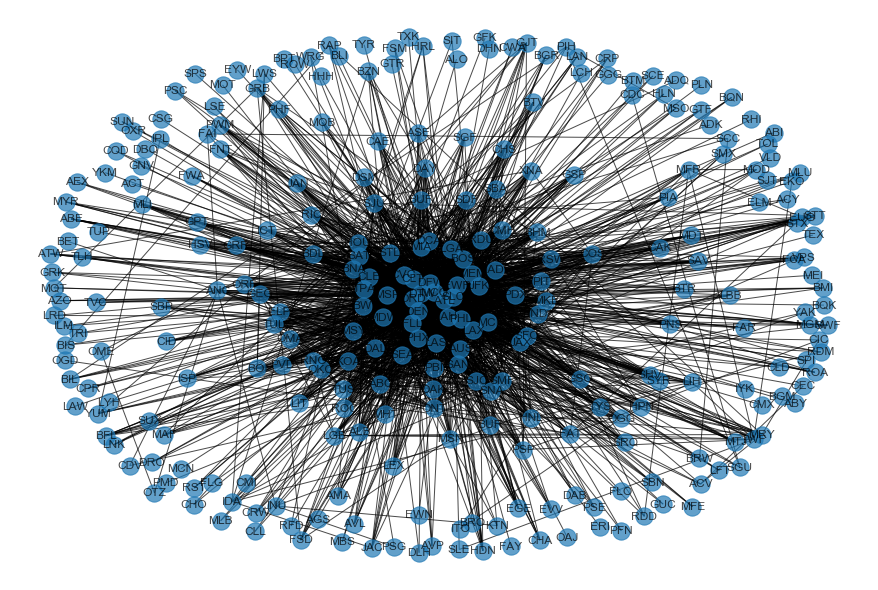

In [194]:
# Отображаем Граф
plt.rcParams["figure.figsize"] = (12, 8)
nx.draw_spring(g,  with_labels=True, alpha=0.7)

### Посчитаем для каждого города его метрики

In [206]:
#коэффициент кластеризации
clustering = nx.clustering(g, weight='weight')

# Степень, или мощность узла - количество его связей
degree = dict(g.degree(weight='weight'))

# Посчитаем важность узлов

# Центральность -  у кого больше связей, тот и важнее
degree_centrality = nx.degree_centrality(g)
# Степень посреднечества - количество кратчайших путей, проходящих через узел
betweenness_centrality = nx.betweenness_centrality(g, weight='weight')
# чем центральнее узел (т.е. чем короче путь от него до всех остальных узлов), тем он важнее
closeness_centrality = nx.closeness_centrality(g)

In [207]:
# Далаем датафрейм для метрик
node_metrics = pd.DataFrame.from_dict(clustering ,orient='index', columns=['clustering']).join([
    pd.DataFrame.from_dict(degree ,orient='index', columns=['degree']),
    pd.DataFrame.from_dict(degree_centrality ,orient='index', columns=['degree_centrality']),
    pd.DataFrame.from_dict(betweenness_centrality ,orient='index', columns=['betweenness_centrality']),    
    pd.DataFrame.from_dict(closeness_centrality ,orient='index', columns=['closeness_centrality'])
])
node_metrics.head()

,clustering,degree,degree_centrality,betweenness_centrality,closeness_centrality
ABE,0.049903,0.001369,0.027972,0.030038,0.434650
ATL,0.020639,0.111903,0.580420,0.294933,0.682578
CLE,0.038519,0.017378,0.220280,0.046807,0.546845
CLT,0.050053,0.035487,0.248252,0.090666,0.555340
CVG,0.025043,0.028605,0.335664,0.064949,0.583673


### Посчитаем медианное время до заражения каждого города

Прогоним симуляцию 50 раз, используя p=0.5 и стартовый аэропорт Allentown, каждый раз сохраняя результаты. 
Используя данные симуляций посчитаем медианное время до заражения каждого города.

In [223]:
from time import sleep
# Прогоним симуляцию 50 раз, используя p=0.5 и стартовый аэропорт Allentown
np.random.seed(42)

# Кол-во симуляций распространения
n_sim = 50

# Аэропорт Allentown (код ABE)
airport = 'ABE'
print('Стартовый аэропорт:', airport)

results_df_50 = pd.DataFrame(columns=['p', 'sim_id', 'airport', 'infected'])

p = 0.5
print('Симуляция для p =', p)

sleep(0.5)

# запуск симуляции
for i in tqdm(range(n_sim), position = 0):
    sim_res = pd.DataFrame.from_dict(do_simulation(airport, p), orient='index').reset_index()
    sim_res.columns = ['airport', 'infected']
    sim_res['p'] = p
    sim_res['sim_id'] = i
    results_df_50 = pd.concat([results_df, sim_res]) 

Стартовый аэропорт: ABE
Симуляция для p = 0.5


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:44<00:00,  8.09s/it]


In [224]:
pd.to_pickle(results_df_50, "data_results_50.pkl")

In [258]:
results_df_50 = pd.read_pickle("data_results_50.pkl")
results_df_50

,p,sim_id,airport,infected
0,0.01,0,ABE,2008-01-01 00:00:00
1,0.01,0,CLE,2008-01-08 07:59:00
2,0.01,0,RIC,2008-01-09 16:35:00
3,0.01,0,MCO,2008-01-09 18:15:00
4,0.01,0,LGA,2008-01-10 10:05:00
...,...,...,...,...
281,0.50,49,WRG,2008-01-04 16:05:00
282,0.50,49,YAK,2008-01-04 17:50:00
283,0.50,49,PLN,2008-01-07 23:45:00
284,0.50,49,CDC,2008-01-08 20:32:00


In [261]:
# Время заражения первого аэропорта
results_df_50 = results_df_50.reset_index(drop=True)
st = results_df_50.loc[0, 'infected']
st
#st = to_datetime(2008, 1, 1, '00:00')
#st

# Сколько прошло времени с момента заражения первого аэропорта
results_df_50['dt'] = results_df_50['infected'] - st
# Считаем среднее время для кажого аэропорта
median_time = results_df_50.groupby('airport')['dt'].apply(np.median)
median_time

airport
ABE   0 days 00:00:00
ABI   1 days 18:35:00
ABQ   0 days 21:05:00
ABY   1 days 17:19:00
ACT   0 days 21:57:00
            ...      
WRG   3 days 16:05:00
XNA   0 days 22:50:00
YAK   2 days 23:34:00
YKM   2 days 21:56:00
YUM   1 days 10:43:00
Name: dt, Length: 287, dtype: timedelta64[ns]

In [267]:
#Добавляем median_time в датафрейм для метрик
metrics_df = node_metrics.join(median_time)
# Переводим в часы
metrics_df['hours'] = metrics_df['dt'].dt.total_seconds()/3600
metrics_df

,clustering,degree,degree_centrality,betweenness_centrality,closeness_centrality,dt,hours
ABE,0.049903,0.001369,0.027972,0.030038,0.434650,0 days 00:00:00,0.000000
ATL,0.020639,0.111903,0.580420,0.294933,0.682578,0 days 16:53:00,16.883333
CLE,0.038519,0.017378,0.220280,0.046807,0.546845,0 days 17:12:00,17.200000
CLT,0.050053,0.035487,0.248252,0.090666,0.555340,0 days 20:25:00,20.416667
CVG,0.025043,0.028605,0.335664,0.064949,0.583673,0 days 20:14:00,20.233333
...,...,...,...,...,...,...,...
TEX,0.000000,0.000178,0.003497,0.000000,0.369987,2 days 11:37:00,59.616667
PMD,0.000000,0.000190,0.003497,0.000000,0.355280,2 days 10:16:00,58.266667
SLE,0.017894,0.000177,0.006993,0.000000,0.377807,1 days 17:00:00,41.000000
SUN,0.022862,0.000725,0.006993,0.000000,0.377807,1 days 11:00:00,35.000000


### Визуализация

Посчитаем коэффициент корреляции Спирмана между метриками

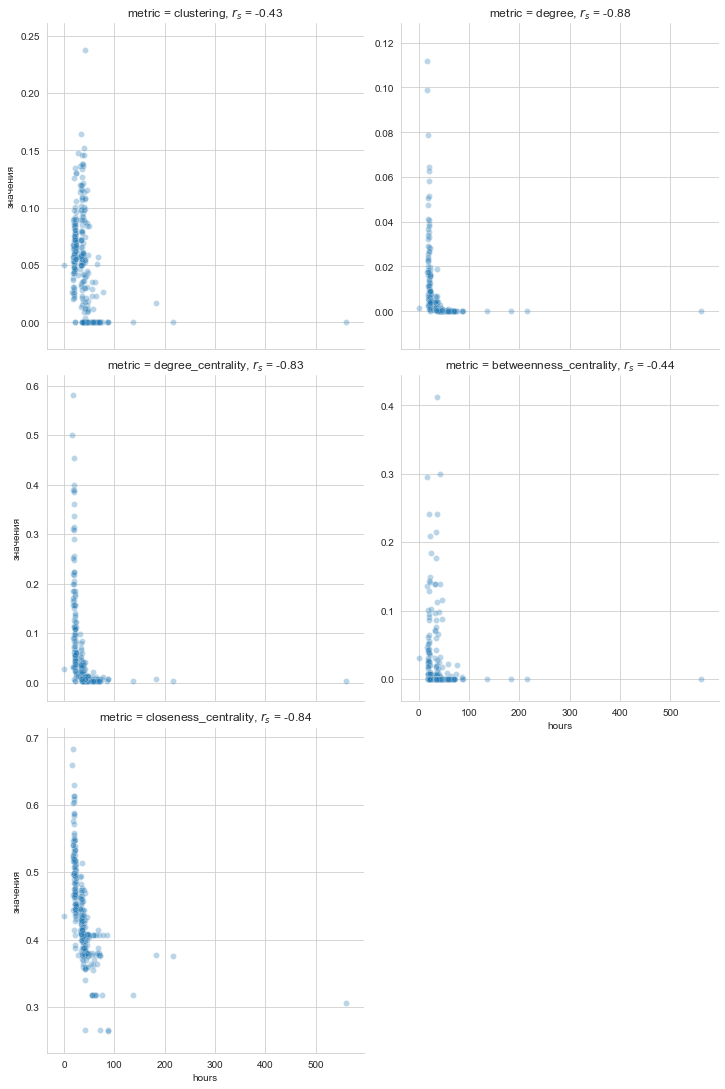

In [273]:
scorr = metrics_df.drop('dt', axis=1).corr('spearman').loc['hours']
# Создаем датасет для визуализации
viz = metrics_df.drop('dt', axis=1).reset_index().melt(id_vars=['index', 'hours'], var_name='metric')
# Визуализация
sns.set_style('whitegrid')
sp = sns.relplot(data=viz, x='hours', y='value', col='metric', facet_kws={'sharey': False, 'sharex': True}, alpha=0.3, col_wrap=2)
# Устанавливаем ylabels
sp.set_ylabels("значения")
# Устанавливаем заголовки
axes = sp.fig.axes
for ax in axes:
    current_title = ax.get_title()
    metric_name = current_title.split(' ')[2]
    title = f'{current_title}, $r_{{s}}$ = {round(scorr[metric_name], 2)}'
    ax.set_title(title)
plt.show()

In [274]:
scorr

clustering               -0.426749
degree                   -0.881004
degree_centrality        -0.833867
betweenness_centrality   -0.438449
closeness_centrality     -0.844212
hours                     1.000000
Name: hours, dtype: float64

### Выводы

Мы видим сильную корреляцию c показателями degree (-0.88) и degree_centrality (-0.84). Очевидно, что чем больше связей - рейсов с другими аэропотами, то тем больше вероятность, что зараженный самолет прилетит быстрее в данный аэропорт.

Также сильная корреляция с показетелнм closeness_centrality (-0.84), что тоже подтвержает, что чем центральнее узел, тем больше рейсов будет проходить через этот узел, что обеспечивает множество путей расспространения инфекции и тем быстрее аэропорт будет заражен.

Коэфициент кластеризации (clustering) и Степень посреднечества (betweenness_centrality) имееют не достаточно выраженную корреляцию (-0.43). Скорее это означает, что между аэропортами с высоким коэфициентом кластеризации выполняются много внутренних рейсов, но относительно меньше рейсов в аэропорты за пределы кластера и это затрудняет расспространение инфекции в и за пределы класстеров.